In [31]:
import matplotlib
from matplotlib import font_manager, rc
import platform

try :
    if platform.system() == 'windows':
        # windows의 경우
        font_name = font_manager.FomntProperties(fname="c:/Windows/Font")
        rc('font', family = font_name)
    else:
        # mac의 경우
        rc('font', family = 'AppleGothic')
except :
    pass

matplotlib.rcParams['axes.unicode_minus'] = False

In [1]:
api_key = 'your api key'

In [42]:
import geopandas as gpd

seoul_file = "/Users/wglee/Desktop/DATA ANALYSIS/wglee87_data/서울시 전통시장 지리정보/TC_SPBE17_2015_W_SHP/TC_SPBE17_2015_W.shp"
seoul = gpd.read_file(seoul_file, encoding='euckr')
seoul.tail()

,EMD_CD,EMD_NM,EMD_ENG_NM,ESRI_PK,SHAPE_AREA,SHAPE_LEN,geometry
462,11680104,청담동,Cheongdam-dong,465,0.000238,0.070422,"POLYGON ((127.05259 37.53031, 127.05285 37.530..."
463,11290116,동선동1가,Dongseon-dong 1(il)-ga,466,0.000008,0.012183,"POLYGON ((127.01699 37.59045, 127.01697 37.590..."
464,11380110,증산동,Jeungsan-dong,437,0.000083,0.045973,"POLYGON ((126.91076 37.58927, 126.91078 37.589..."
465,11380105,구산동,Gusan-dong,438,0.000142,0.053630,"POLYGON ((126.90601 37.61893, 126.90608 37.618..."
466,11380108,역촌동,Yeokchon-dong,446,0.000118,0.058186,"POLYGON ((126.91753 37.61110, 126.91756 37.611..."


In [36]:
market = pd.read_csv('/Users/wglee/Desktop/DATA ANALYSIS/\
wglee87_data/서울시 전통시장 지리정보/contents.csv', encoding='utf-8')
market.tail(2)

,콘텐츠 ID\n(필수 입력),사용유무\n(필수입력),콘텐츠명\n(필수 입력),서브카테고리 명\n(선택 입력),시군\n(선택입력),구명\n(선택입력),새주소[도로명 주소]\n(조건부 선택 입력),지번주소,키워드,다국어\n(필수 입력),...,상세 제목16\n(선택 입력),상세 내용16\n(선택 입력),상세 제목17\n(선택 입력),상세 내용17\n(선택 입력),상세 제목18\n(선택 입력),상세 내용18\n(선택 입력),상세 제목19\n(선택 입력),상세 내용19\n(선택 입력),상세 제목20\n(선택 입력),상세 내용20\n(선택 입력)
347,Sijang_ddm_003,Y,경동시장,일반시장,NaN,동대문구,왕산로 147,동대문구 제기동 1018,NaN,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,Sijang_ddm_001,Y,용두시장,일반시장,NaN,동대문구,한빛로 62-1,동대문구 용두동 231-5,NaN,KOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
address = "서울 특별시 " + market["지번주소"].sample(50)
address = list(address)
address[:3]

['서울 특별시 마포구 용강동 50-16', '서울 특별시 금천구 시흥동 886-6', '서울 특별시 마포구 연남동 227-15']

In [38]:
# !pip install geopy

In [39]:
location = gpd.tools.geocode(address, provider='googlev3', api_key=api_key)
location.tail()

,geometry,address
45,POINT (127.00818 37.57053),"289-45 Jongno 6(yuk)-ga, Jongno-gu, Seoul, Sou..."
46,POINT (127.04086 37.58088),"629-2 Jegi-dong, Dongdaemun-gu, Seoul, South K..."
47,POINT (127.07638 37.53193),"602 Jayang-dong, Gwangjin-gu, Seoul, South Korea"
48,POINT (126.91640 37.47439),"727-5 Sillim-dong, Gwanak-gu, Seoul, South Korea"
49,POINT (127.00219 37.49924),"225 Banpo-dong, Seocho-gu, Seoul, South Korea"


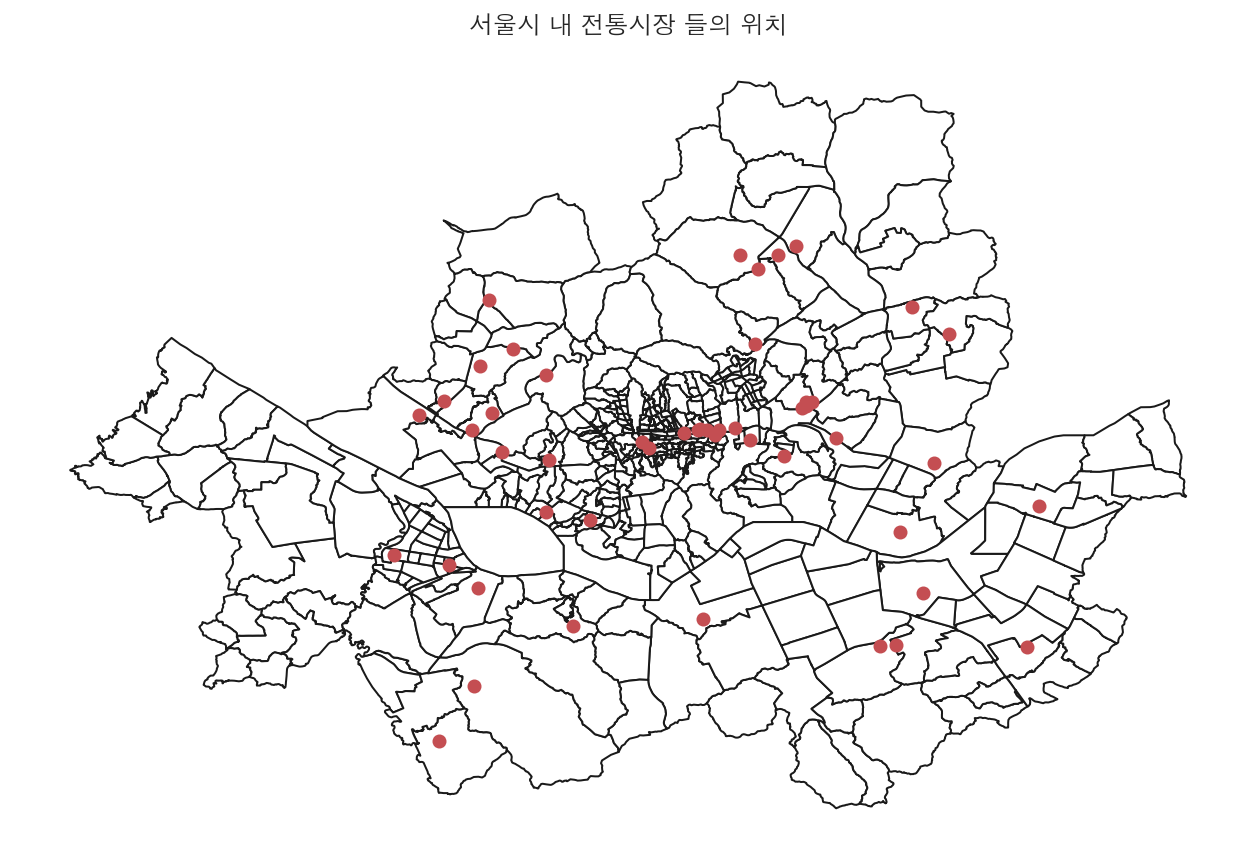

In [43]:
ax = seoul.plot(figsize=(11, 11), color="w", edgecolor="k")
ax.set_title("서울시 내 전통시장 들의 위치")
location.plot(ax=ax, color='r')
ax.set_axis_off()
plt.show()